## Decriptive Analysis: Distance and Family

First, let's load the data.

In [1]:
import pandas as pd
df = pd.read_csv('../../Data/SMTO_2015/SMTO_2015_Complete_Input.csv')
df.head()

,Campus,Level,Status,Mode_Actual,Gender,Licence,Work,Age,HomeZone,Family,...,Domestic.OC,Admission_Avg.SG,Admission_Avg.SC,Admission_Avg.MI,Admission_Avg.YK,Admission_Avg.YG,Admission_Avg.RY,Admission_Avg.OC,Exp_Segment,Exp_Level
0,Scarborough (UTSC),UG,FT,Transit Bus,Female,0,Unknown,20,261,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.944738,0.944738
1,Downtown Toronto (St. George),Grad,FT,Walk,Female,1,Unknown,25,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085
2,Downtown Toronto (St. George),UG,FT,Transit Bus,Female,1,Unknown,23,3714,1,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
3,Downtown Toronto (St. George),UG,FT,Walk,Male,1,Unknown,20,74,0,...,0.8998,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.919270,0.919270
4,Downtown Toronto (St. George),Grad,FT,Walk,Male,1,Unknown,27,71,0,...,0.6786,0.893,0.841,0.83,0.817,0.817,0.84,0.824,0.986085,0.986085


We wish to see the effect of distance on school choice. To do this, let's plot graphs of how the probability of going to each school changes for different distances from the school. We bin students by their home zone's distance from each campus, and plot how the proportion of students attending each campus from each bin changes according to this distance.

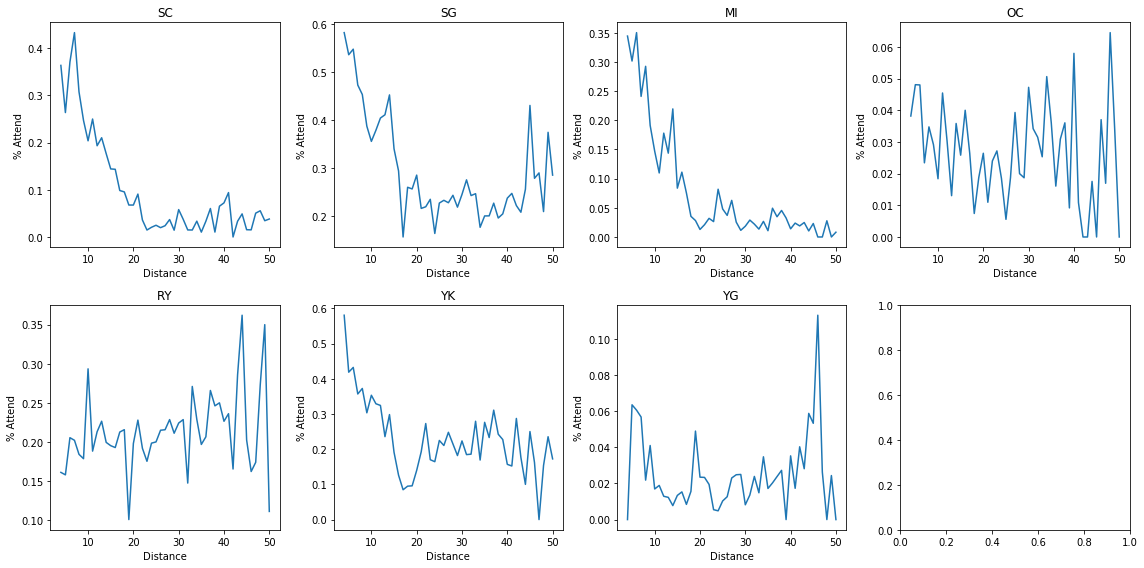

In [2]:
import matplotlib.pyplot as plt
plt.subplots(2, 4, figsize=(16, 8))
for j in range(len(df['School_Codes'].unique())):
    campus = df['School_Codes'].unique()[j]
    y = []
    x = list(range(4, 51, 1))
    prev = list(range(3, 50, 1))
    for i in range(len(x)):
        try:
            y.append(df[(df['Dist.' + campus] <= x[i]) & (df['Dist.' + campus] >= prev[i])]['School_Codes'].value_counts(normalize=True)[campus])
        except:
            y.append(0)
    plt.subplot(2, 4, j+1)
    plt.plot(x, y)
    plt.title(campus)
    plt.xlabel('Distance')
    plt.ylabel('% Attend')
    plt.tight_layout()
plt.show()

Interestingly, the patterns with respect to distance allow us to group the campuses into two groups:
1. SC, SG, MI, YK: For these campuses, distance is an important factor. Students living close to the campus are more likely to attend it than students living far from the campus. However, this effect tails off after around 20km.  
2. OC, RY, YG: For these campuses, it does not appear that distance has a clear effect on probability of attending a school.

Let us see whether these patterns apply primarily to students living with family or not.

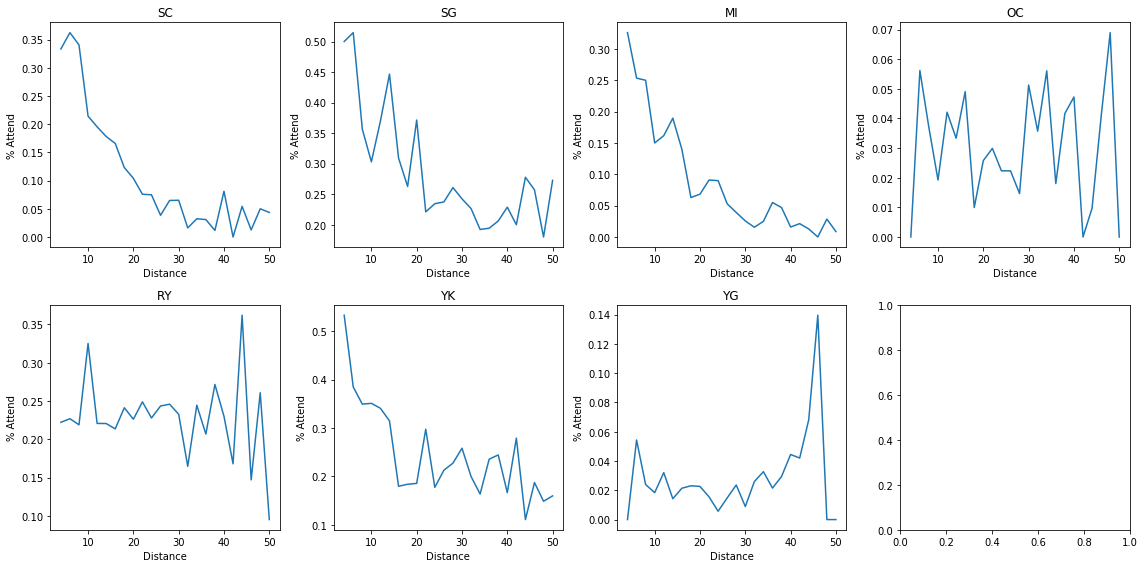

In [3]:
temp = df[df['Family'] == 1]
plt.subplots(2, 4, figsize=(16, 8))
for j in range(len(df['School_Codes'].unique())):
    campus = df['School_Codes'].unique()[j]
    dist_col = 'Dist.' + campus
    y = []
    x = list(range(4, 51, 2))
    prev = list(range(3, 50, 2))
    for i in range(len(x)):
        try:
            y.append(temp[(temp[dist_col] <= x[i]) & (temp[dist_col] >= prev[i])]['School_Codes'].value_counts(normalize=True)[campus])
        except:
            y.append(0)
    plt.subplot(2, 4, j+1)
    plt.plot(x, y)
    plt.title(campus)
    plt.xlabel('Distance')
    plt.ylabel('% Attend')
    plt.tight_layout()
plt.show()

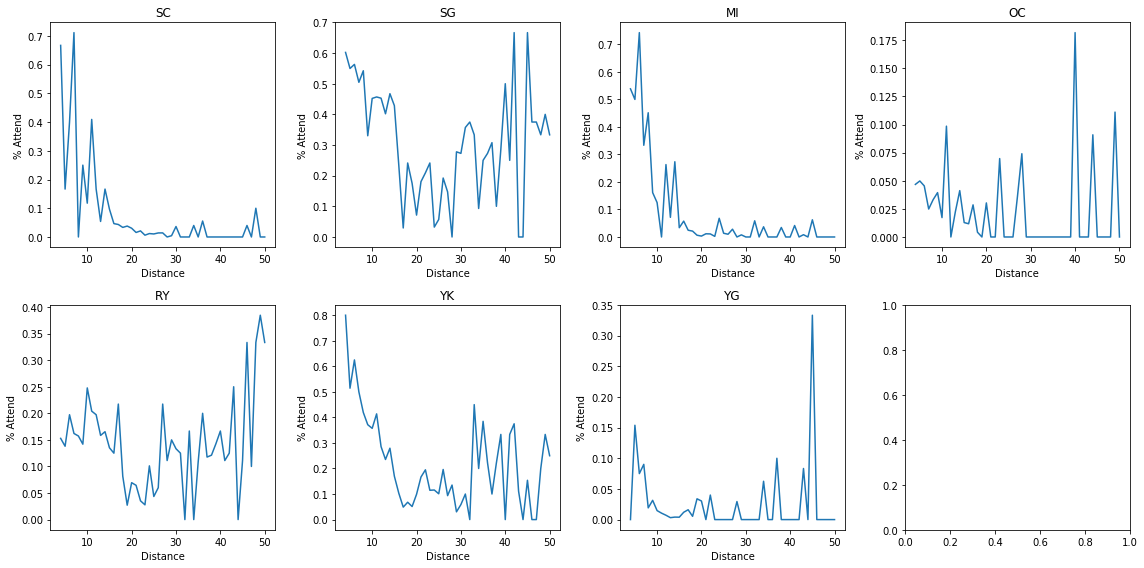

In [4]:
temp = df[df['Family'] == 0]
plt.subplots(2, 4, figsize=(16, 8))
for j in range(len(df['School_Codes'].unique())):
    campus = df['School_Codes'].unique()[j]
    dist_col = 'Dist.' + campus
    y = []
    x = list(range(4, 51, 1))
    prev = list(range(3, 50, 1))
    for i in range(len(x)):
        try:
            y.append(temp[(temp[dist_col] <= x[i]) & (temp[dist_col] >= prev[i])]['School_Codes'].value_counts(normalize=True)[campus])
        except:
            y.append(0)
    plt.subplot(2, 4, j+1)
    plt.plot(x, y)
    plt.title(campus)
    plt.xlabel('Distance')
    plt.ylabel('% Attend')
    plt.tight_layout()
plt.show()

There are some interesting differences in the trends for the different groups. Specifically, the influence of distance on students not living with their family tails of faster than students whoa re living with their family, especially for U of T's Scarborough amd Mississauga campuses.

It is interesting to check whether the group each school falls into is related to the proportion of students attending that school who live with their family.

In [5]:
print("Family Proportion for SC/SG/MI/YK: ", df[df['School_Codes'].isin(['SC', 'SG', 'MY', 'YK'])]['Family'].mean())
print("Family Proportion for OC/RY/YG:    ", df[df['School_Codes'].isin(['OC', 'RY', 'YG'])]['Family'].mean())

df.groupby('School_Codes')['Family'].value_counts(normalize=True, sort=False, ascending=False).round(3)*100

Family Proportion for SC/SG/MI/YK:  0.5205371248025277
Family Proportion for OC/RY/YG:     0.6466868298047842


School_Codes  Family
MI            0         27.2
              1         72.8
OC            0         49.8
              1         50.2
RY            0         33.1
              1         66.9
SC            0         26.5
              1         73.5
SG            0         58.7
              1         41.3
YG            0         34.4
              1         65.6
YK            0         34.8
              1         65.2
Name: Family, dtype: float64

Indeed, the proportion of students who live with their family is higher for those campuses for which distance appears less important.

To gain some further insight into these proportions, we can compare the distribution of students attending each campus for those living with family, and those living away from their family.

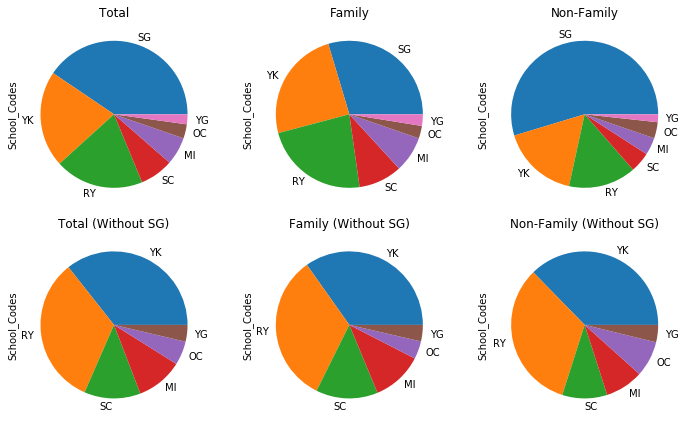

In [6]:
plt.subplots(2, 3, figsize=(10, 6))

plt.subplot(2, 3, 1)
plt.title('Total')
df['School_Codes'].value_counts().plot.pie()

plt.subplot(2, 3, 2)
plt.title('Family')
df[df['Family'] == 1]['School_Codes'].value_counts().plot.pie()

plt.subplot(2, 3, 3)
plt.title('Non-Family')
df[df['Family'] == 0]['School_Codes'].value_counts().plot.pie()

plt.subplot(2, 3, 4)
plt.title('Total (Without SG)')
df[df['School_Codes']!= 'SG']['School_Codes'].value_counts().plot.pie()

plt.subplot(2, 3, 5)
plt.title('Family (Without SG)')
df[(df['Family'] == 1) & (df['School_Codes']!= 'SG')]['School_Codes'].value_counts().plot.pie()

plt.subplot(2, 3, 6)
plt.title('Non-Family (Without SG)')
df[(df['Family'] == 0) & (df['School_Codes']!= 'SG')]['School_Codes'].value_counts().plot.pie()

plt.tight_layout()
plt.show()

Notably, the distribution of students living away from their family includes a much higher proportion of students who attend St. George campus than for students living with their family. We can tabulate the breakdown by campus as well.

In [7]:
df.groupby('Family')['School_Codes'].value_counts(normalize=True, ascending=False).round(4)*100

Family  School_Codes
0       SG              54.67
        YK              16.92
        RY              14.85
        SC               4.48
        MI               3.81
        OC               3.56
        YG               1.72
1       SG              29.63
        YK              24.49
        RY              23.12
        SC               9.58
        MI               7.88
        OC               2.77
        YG               2.54
Name: School_Codes, dtype: float64